In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import pandas as pd
import plotly.io as pio
pio.renderers.default = "notebook"
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
from utils import analyze_results, plot_null_reports_analysis

In [10]:
path = "ray/criteo/large/bias_varying_workload_size"
df = analyze_results(path, "bias", parallelize=False)
for destination in df.groupby(['destination']).destination.unique():
    advertiser = df[df['destination'].isin(destination)]
    plot_null_reports_analysis(advertiser, save_dir="large")

In [12]:
conversions = pd.read_csv("../data/criteo/criteo_query_pool_conversions.csv")
conversions.head()

/tmp/ipykernel_290849/250461330.py:1: DtypeWarning:

Columns (0,3,4) have mixed types. Specify dtype option on import or set low_memory=False.



,product_age_group,device_type,audience_id,product_gender,product_brand,product_category1,product_category2,product_category3,product_category4,product_category5,...,product_id,product_title,partner_id,user_id,filter,count,conversion_timestamp,epsilon,aggregatable_cap_value,key
0,NaN,7E56C27BFF0305E788DA55A029EC4988,753CF7753EC7A396179ED3594653CC13,NaN,NaN,62D6A49514020FA0B2E434DB0B506005,49C166361658D9ACF79C78FC97272B01,BCCC1BBBA27989E192D26A0DA25E448E,475800E5EFF1419DAEC323D19B26FACA,NaN,...,90612FF11CA9CF59FD75EAF4CF58F28D,3CE025FF50DC6121F586935DB9A27C59 77988253062A9...,E3DDEB04F8AFF944B11943BB57D2F620,6532755E1945B2E36E641B1EE2F9A13B,NaN,1.0,1596444558,0.023026,5,0
1,NaN,D7D1FB49049702BF6338894757E0D959,NaN,NaN,NaN,62D6A49514020FA0B2E434DB0B506005,FB9484497C58FBB55B560FC0E5084505,17BDA4721F50ECEDC800F69FF3C64284,NaN,NaN,...,70ED855757C4109EB6F900908E140F4D,7450BC9756C8412DA8F8783AA3F14430 BAB74FFA4F47A...,E3DDEB04F8AFF944B11943BB57D2F620,F65A926B802E135329B4F9B79C50BF12,NaN,1.0,1596446640,0.023026,5,0
2,NaN,D7D1FB49049702BF6338894757E0D959,2F89384F5373F64EA809EEC44387F05E,NaN,NaN,62D6A49514020FA0B2E434DB0B506005,41DF6386116137A19E7DBC07CE44C95A,0C794498732FC4833A4B7F29F8F072E3,NaN,NaN,...,FCEAA1273E91D47D95C36B9447237F5C,EB7EA31F5A420E4390F0F2BFE1E40A6C E61B6A17E1ADD...,E3DDEB04F8AFF944B11943BB57D2F620,0E53E6ADE13001E44CCDA28F7C9C9FAC,NaN,1.0,1596446894,0.023026,5,0
3,NaN,7E56C27BFF0305E788DA55A029EC4988,NaN,NaN,NaN,62D6A49514020FA0B2E434DB0B506005,3A72153A6DFD4E73EB064046483B41A3,NaN,NaN,NaN,...,2CDC7DE53EB15C2637C22684EA829EDA,9A0EA21647E006E4AAA6908795A06465 DAB76C94716E6...,E3DDEB04F8AFF944B11943BB57D2F620,258702A2D84B42E2B8D8D83B2D113A84,NaN,1.0,1596448190,0.023026,5,0
4,NaN,D7D1FB49049702BF6338894757E0D959,NaN,NaN,NaN,62D6A49514020FA0B2E434DB0B506005,4DAFDA14BF0936059EFDC88FA633F99A,4426ED81947672CC76987EE4559EFA40,95D029006FB9845E781FCCA5E71B6C63,639169EDCF27539835152A48591E896A,...,D38F8C3168DD0E49E2FB0B16B408DBEF,2309613EA4768A07D03277B6A4DBF23A 5974636DF9B92...,E3DDEB04F8AFF944B11943BB57D2F620,A7A0B6D44EBD2F7797D739766344AFE5,NaN,1.0,1596449992,0.023026,5,0


In [31]:
import matplotlib.pyplot as plt

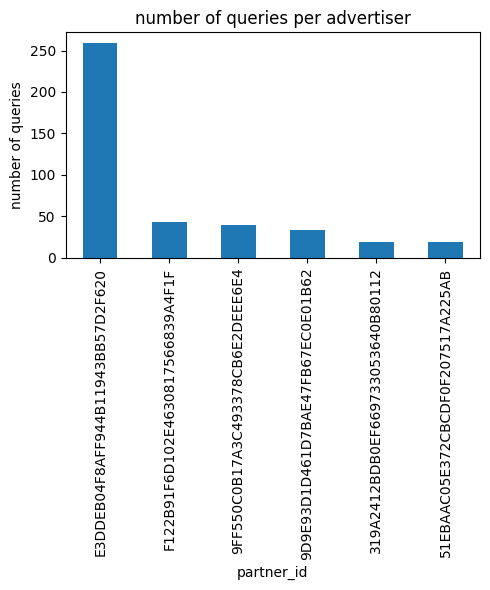

In [40]:
ax = (conversions[["partner_id", "key"]]
        .drop_duplicates()
        .groupby(["partner_id"])
        .key
        .count()
        .sort_values(ascending=False)
        .plot(kind="bar", ylabel="number of queries", title="number of queries per advertiser", figsize=(5, 6))
)
fig = ax.get_figure()
plt.tight_layout()
fig.savefig("./large/criteo_advertiser_query_count.png")

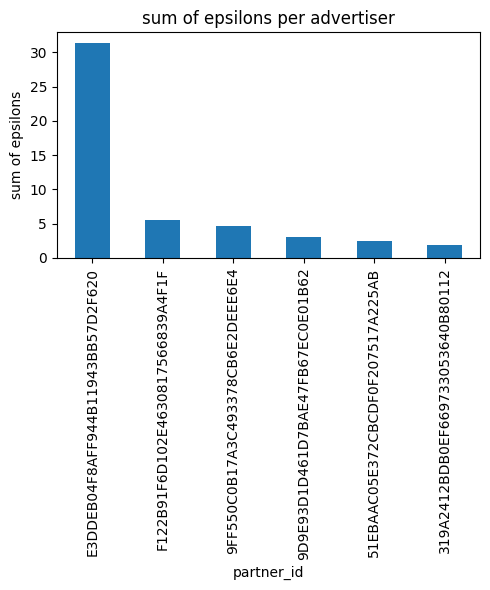

In [39]:
ax = (conversions[["partner_id", "key", "epsilon"]]
        .drop_duplicates()
        .groupby(["partner_id"])
        .epsilon
        .sum()
        .sort_values(ascending=False)
        .plot(kind="bar", ylabel="sum of epsilons", title="sum of epsilons per advertiser", figsize=(5, 6))
)
fig = ax.get_figure()
plt.tight_layout()
fig.savefig("./large/criteo_advertiser_epsilon_sum.png")

/tmp/ipykernel_290849/161834449.py:2: DtypeWarning:

Columns (0,3,4,9,10) have mixed types. Specify dtype option on import or set low_memory=False.



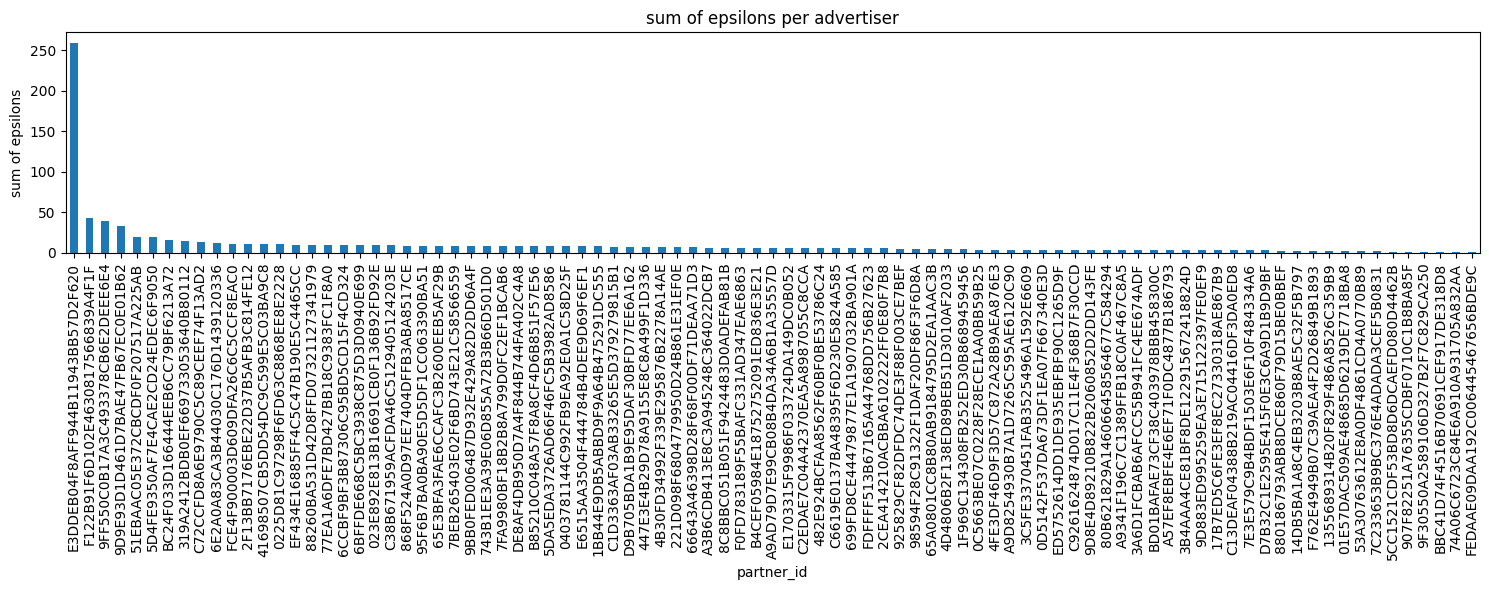

In [42]:
import matplotlib.pyplot as plt
conversions = pd.read_csv("../data/criteo/criteo_query_pool_all_conversions.csv")

ax = (conversions[["partner_id", "key"]]
        .drop_duplicates()
        .groupby(["partner_id"])
        .key
        .count()
        .sort_values(ascending=False)
        .plot(kind="bar", ylabel="number of queries", title="number of queries per advertiser", figsize=(15, 6))
)
fig = ax.get_figure()
plt.tight_layout()
fig.savefig("./all/criteo_advertiser_query_count.png")

ax = (conversions[["partner_id", "key", "epsilon"]]
        .drop_duplicates()
        .groupby(["partner_id"])
        .epsilon
        .sum()
        .sort_values(ascending=False)
        .plot(kind="bar", ylabel="sum of epsilons", title="sum of epsilons per advertiser", figsize=(15, 6))
)
fig = ax.get_figure()
plt.tight_layout()
fig.savefig("./all/criteo_advertiser_epsilon_sum.png")

In [17]:
"""
Can you also plot the following graph: x axis: advertisers (sorted in descending order
of the number of queries in their workload); y axis: fraction of queries that the
advertiser x is able to execute by the end of his experiment with a target relative
accuracy t. This t could be (say) 90% if the workload generation had provisioned the
epsilons for absolute accuracy 95% with 99% probability. You can take a sample of
advertisers, you dont have to run experiments for absolutely all of them!

For Criteo, wouldn't this just be 100% all of the time?

relative_accuracy = measurement / actual_value * 100
relative_accuracy >= t = 90
"""

conversions = pd.read_csv("../data/criteo/criteo_query_pool_large_conversions.csv")
advertiser_query_counts = (conversions[["partner_id", "key"]]
    .drop_duplicates()
    .groupby(["partner_id"])
    .key
    .count()
    .rename_axis("destination"))


In [33]:

results = analyze_results(
    "ray/criteo/large/bias_varying_workload_size",
    "bias",
    parallelize=False,
    t=.999
)


# for destination in df.groupby(['destination']).destination.unique():
#     advertiser = df[df['destination'].isin(destination)]
#     plot_null_reports_analysis(advertiser, save_dir="large")

In [35]:
# pd.merge(advertiser_query_counts, results, how="inner", on="destination")
# pd.merge(advertiser_query_counts, results, how="inner", on="destination")
# advertiser_query_counts
elems = results.loc[(results.workload_size == 15) & (results.baseline == "cookiemonster")]

In [36]:
pd.merge(advertiser_query_counts, elems, how="inner", on="destination")

,destination,key,workload_size,fraction_queries_without_null_reports,average_accuracy,fraction_relatively_accurate,baseline,num_days_per_epoch,initial_budget
0,319A2412BDB0EF669733053640B80112,19,15,1.0,1.0,1.0,cookiemonster,7,1.0
1,51EBAAC05E372CBCDF0F207517A225AB,19,15,1.0,1.0,1.0,cookiemonster,7,1.0
2,9D9E93D1D461D7BAE47FB67EC0E01B62,34,15,1.0,1.0,1.0,cookiemonster,7,1.0
3,9FF550C0B17A3C493378CB6E2DEEE6E4,39,15,1.0,1.0,1.0,cookiemonster,7,1.0
4,E3DDEB04F8AFF944B11943BB57D2F620,264,15,1.0,1.0,1.0,cookiemonster,7,1.0
5,F122B91F6D102E4630817566839A4F1F,43,15,1.0,1.0,1.0,cookiemonster,7,1.0
